In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Link Kaggle with Github then load our dataset
soccer_df = pd.read_csv("https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/fundamentals/football_players.csv",low_memory=False)
soccer_df

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,89,63,89,63,93,95,...,83,94,23,91,92,31,80,85,88,ST LW
1,L. Messi,30,Argentina,93,92,48,90,95,95,96,...,88,85,26,87,73,28,59,90,85,RW
2,Neymar,25,Brazil,92,94,56,96,82,95,92,...,81,80,33,90,78,24,53,80,83,LW
3,L. Suárez,30,Uruguay,92,88,78,86,60,91,83,...,83,87,38,77,89,45,80,84,88,ST
4,M. Neuer,31,Germany,92,58,29,52,35,48,70,...,55,25,11,61,44,10,83,70,11,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,A. Kelsey,17,England,46,24,16,38,26,12,23,...,19,19,10,32,28,11,50,26,6,GK
17977,B. Richardson,47,England,46,25,44,35,44,22,44,...,12,13,13,25,32,12,47,17,12,GK
17978,J. Young,17,Scotland,46,66,26,60,77,41,50,...,42,42,14,51,33,17,32,37,33,ST
17979,J. Lundstram,18,England,46,57,46,58,74,43,45,...,49,43,47,58,49,48,46,51,25,CM


In [3]:
# We need to change some columns to 'numerical values'
cols = ['Age', 'Overall', 'Acceleration', 'Aggression',
       'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve',
       'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving',
       'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes',
       'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing',
       'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
       'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
       'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']

soccer_df[cols] = soccer_df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

Part 1: Create a bar graph using Matplotlib to represent the average overall rating for players from the top five nationalities (based on the number of players in each nationality). Be sure to customise the graph as you see fit.

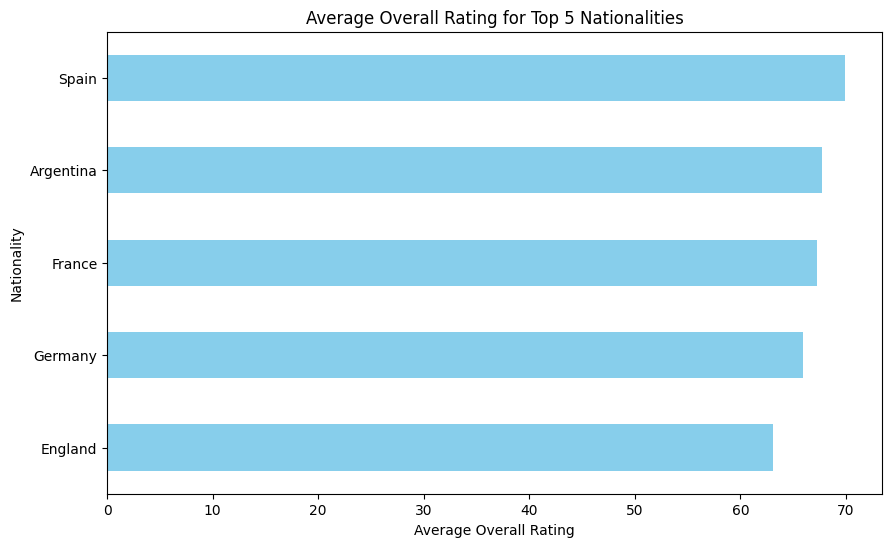

In [4]:
# Identify the top five nationalities based on the player count
top_nationalities = soccer_df['Nationality'].value_counts().head(5).index

# Filter the dataset for players from the top five nationalities
top_players_df = soccer_df[soccer_df['Nationality'].isin(top_nationalities)]

# Calculate the average overall rating for each nationality
avg_ratings = top_players_df.groupby('Nationality')['Overall'].mean()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
avg_ratings.sort_values().plot(kind='barh', color='skyblue')
plt.title('Average Overall Rating for Top 5 Nationalities')
plt.xlabel('Average Overall Rating')
plt.ylabel('Nationality')
plt.show()

Part 2: Generate a pie chart to visualise the percentage distribution of player ages
    Use bins of [15, 20, 25, 30, 35] to categorise players into specific age groups before plotting the pie chart.

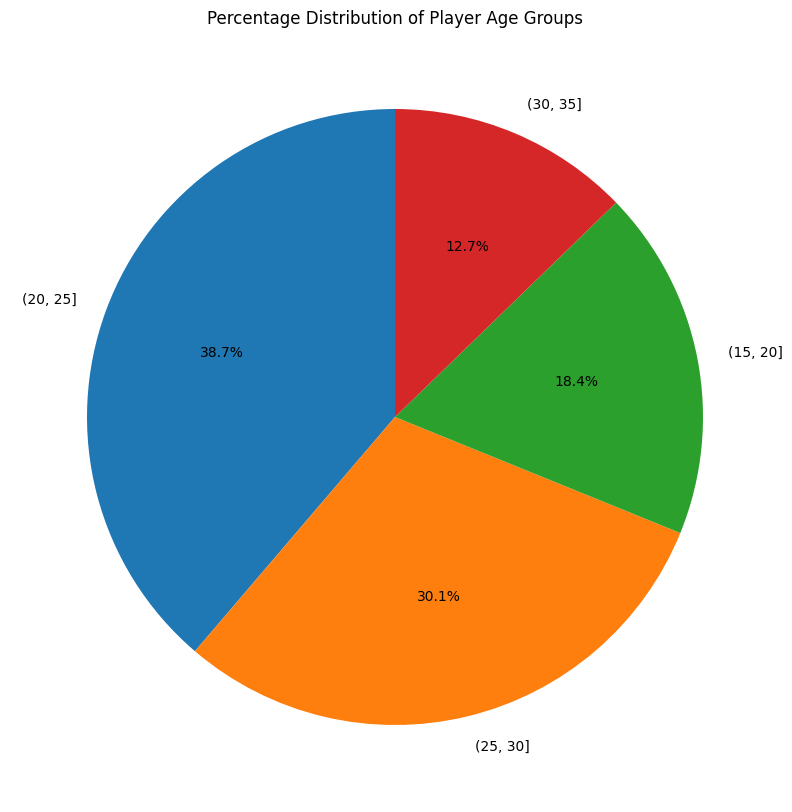

In [5]:
# Bin ages into groups
age_bins = [15, 20, 25, 30, 35]
soccer_df['Age Group'] = pd.cut(soccer_df['Age'], bins=age_bins)

# Plotting the pie chart for age distribution
plt.figure(figsize=(10, 10))
soccer_df['Age Group'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.title('Percentage Distribution of Player Age Groups')
plt.ylabel('')  # Remove the default 'Age Group' label on the y-axis
plt.show()

Part 3: Create a line graph using Matplotlib to show the trend of average Acceleration and Sprint speed across different age groups. Customise the graph appropriately.

Assume that the age bins are defined as [15, 20, 25, 30, 35].

/tmp/ipykernel_18/3797072161.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = soccer_df.groupby('Age Group')[['Acceleration', 'Sprint speed']].mean()


<Figure size 1000x600 with 0 Axes>

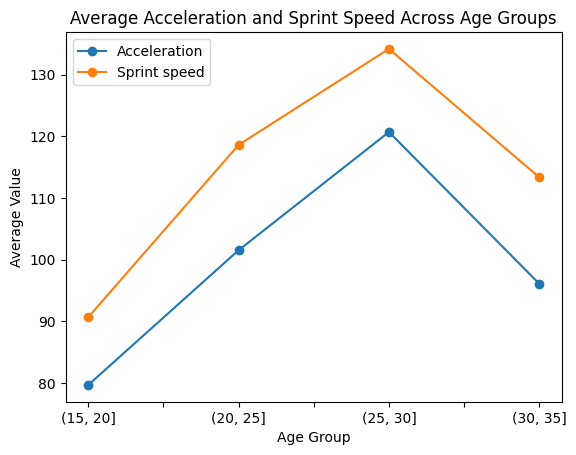

In [6]:
# Grouping by age group and calculating average Acceleration and Sprint Speed
age_group_stats = soccer_df.groupby('Age Group')[['Acceleration', 'Sprint speed']].mean()

# Plotting the line graph
plt.figure(figsize=(10, 6))
age_group_stats.plot(kind='line', marker='o')
plt.title('Average Acceleration and Sprint Speed Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average Value')
plt.show()

Slice the dataset to only include players from the top three nationalities with the highest average Overall rating. Then, create a box plot using Seaborn to compare the distribution of specific skills, including Dribbling, Short passing, Shot power, and Ball control for players from these nations.

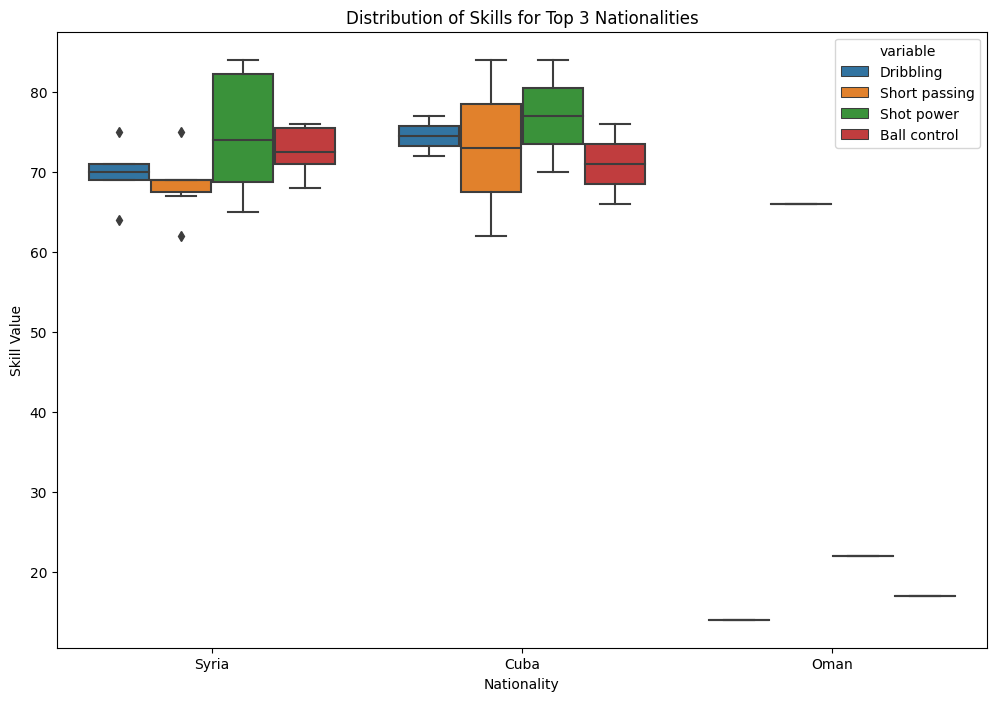

In [7]:
# Find the top three nationalities with the highest average Overall rating
top_nationalities = soccer_df.groupby('Nationality')['Overall'].mean().nlargest(3).index

# Slice the dataset for players from the top three nationalities
top_players_df = soccer_df[soccer_df['Nationality'].isin(top_nationalities)]

# Define the specific skills for comparison
skills_to_compare = ['Dribbling','Short passing','Shot power', 'Ball control']

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Nationality', y='value', hue='variable', data=pd.melt(top_players_df, id_vars=['Nationality'], value_vars=skills_to_compare))
plt.title('Distribution of Skills for Top 3 Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Skill Value')
plt.show()

Part 5: Implement an interactive visualisation using Plotly to allow users to explore the relationship between Strength, Vision, and the Overall rating using the hover information feature to allow the user to have an interactive view of the data.

Arrange the plot as follows:

Place Strength on the x-axis.
Place Vision on the y-axis.
Colour-code the points to represent the Overall rating.
Include a hover that has the name of the player as well as the Strength, Vision, and Overall ratings for each player.

In [8]:
import plotly.express as px

# Scatter plot using Plotly
fig = px.scatter(soccer_df, x='Strength', y='Vision', color='Overall', hover_name='Name',
                 title='Interactive Scatter Plot of Strength and Vision vs Overall Rating',
                 labels={'Strength': 'Strength Rating', 'Vision': 'Vision Rating', 'Overall': 'Overall Rating'})

# Show the interactive plot
fig.show()